# Examples from Francois Chollet's "Deep learning in Python" 2nd edition


In [12]:
# All-ones or all-zeros tensors
import tensorflow as tf
import numpy as np
x = tf.ones(shape=(2, ))
print(x)

tf.Tensor([1. 1.], shape=(2,), dtype=float32)


In [13]:
x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [14]:
y = [1.0, 1.0]
print(type(y))
print(y)

<class 'list'>
[1.0, 1.0]


In [15]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [19]:
# Random Tensors
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.08144975]
 [0.17406964]
 [0.88036585]], shape=(3, 1), dtype=float32)


In [17]:
# np arrays are assignable!
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
print(x)

[[0. 1.]
 [1. 1.]]


In [18]:
# Expect Error for running this as Tensor constants are not assignable
x = tf.ones(shape=(2, 2))
x[0, 0] = 0.0
print(x)

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [21]:
# Variable
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

v.assign(tf.ones((3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.15759324],
       [ 0.7023137 ],
       [-0.4874358 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


In [24]:
# Assigning value to a portion of variable
v[0, 0].assign(3.)
print(v)

v.assign_add(tf.ones((3, 1)))

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [2.],
       [2.]], dtype=float32)>


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [3.],
       [3.]], dtype=float32)>

In [25]:
# Numpy Arrays behave as variables, not constants
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
print(x)

[[0. 1.]
 [1. 1.]]


In [26]:
a = tf.ones((2, 2))
print("a:\n", a)
b = tf.square(a)
print("b:\n", b)
c = tf.sqrt(a)
print("c:\n", c)
d = b + c
print("d:\n", d)
e = tf.matmul(a, b)
print("e:\n", e)
e *= d
print("e:\n", e)

a:
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
b:
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
c:
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
d:
 tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
e:
 tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
e:
 tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [28]:
# Gradient Tape!
in_var = tf.Variable(initial_value=3.)
print("in_var = ", in_var.numpy())  # .numpy() prints only the value

with tf.GradientTape() as tape:
   result = tf.square(in_var)
gradient = tape.gradient(result, in_var)

print("d(in_var**2)/d(in_var) = ", gradient.numpy())

in_var =  3.0
d(in_var**2)/d(in_var) =  6.0


In [30]:
# Using the GradientTape with constant tensor inputs
in_const = tf.constant(4.)
print("in_const = ", in_const.numpy())  # .numpy() prints only the value

with tf.GradientTape() as tape:
   tape.watch(in_const)    # constants are normally not tracked. This one is watched, however.
   result = tf.square(in_const)

gradient = tape.gradient(result, in_const)

print("d(in_const**2)/d(in_const) = ", gradient.numpy())

in_const =  4.0
d(in_const**2)/d(in_const) =  8.0


In [31]:
# Using nested gradient tapes to compute second-order gradients

time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.905 * time ** 2  # 0.5gt^2 (g = 9.81 m/sec^2)
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

acceleration.numpy()

np.float32(9.81)

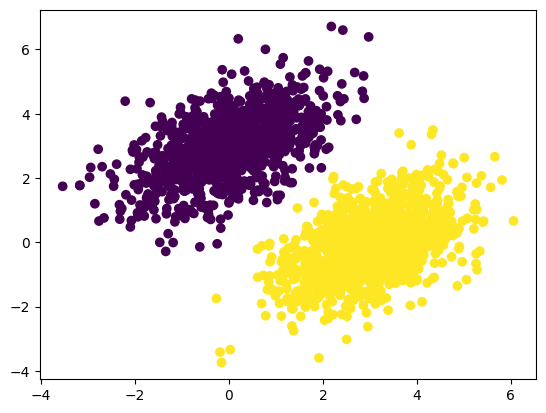

In [36]:
# Linear Classifier in TensorFlow!

import tensorflow as tf
import numpy as np
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

Loss at step 0: 5.3382
Loss at step 1: 0.3389
Loss at step 2: 0.1471
Loss at step 3: 0.1176
Loss at step 4: 0.1069
Loss at step 5: 0.0991
Loss at step 6: 0.0922
Loss at step 7: 0.0860
Loss at step 8: 0.0803
Loss at step 9: 0.0752
Loss at step 10: 0.0705
Loss at step 11: 0.0663
Loss at step 12: 0.0625
Loss at step 13: 0.0590
Loss at step 14: 0.0558
Loss at step 15: 0.0530
Loss at step 16: 0.0504
Loss at step 17: 0.0480
Loss at step 18: 0.0459
Loss at step 19: 0.0439
Loss at step 20: 0.0422
Loss at step 21: 0.0406
Loss at step 22: 0.0391
Loss at step 23: 0.0378
Loss at step 24: 0.0366
Loss at step 25: 0.0355
Loss at step 26: 0.0345
Loss at step 27: 0.0336
Loss at step 28: 0.0328
Loss at step 29: 0.0321
Loss at step 30: 0.0314
Loss at step 31: 0.0308
Loss at step 32: 0.0303
Loss at step 33: 0.0298
Loss at step 34: 0.0293
Loss at step 35: 0.0289
Loss at step 36: 0.0285
Loss at step 37: 0.0282
Loss at step 38: 0.0279
Loss at step 39: 0.0276


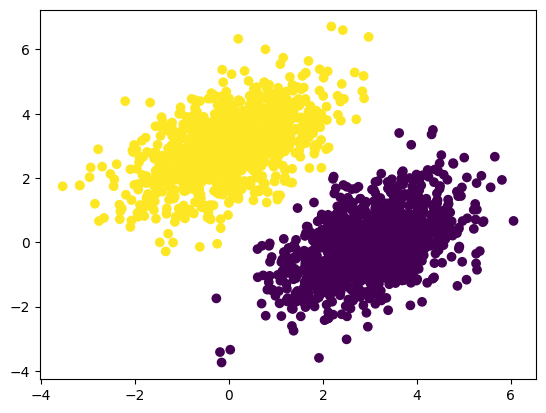

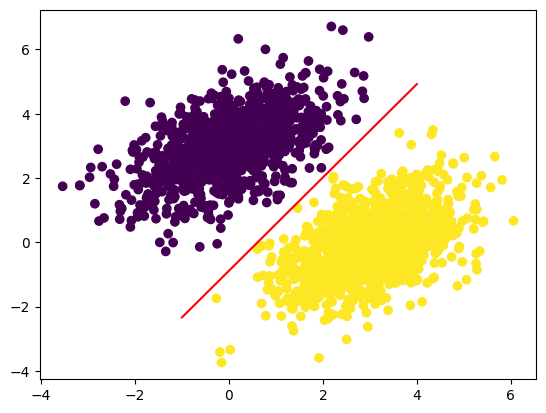

In [40]:
# Creating the linear classifier variables
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

#The forward pass function
def model(inputs):
    return tf.matmul(inputs, W) + b

# The mean squared error loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

# The training step function
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

#The batch training loop
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] < 0.5)
plt.show()

x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)